# Cross validation of time series data

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
series = read_csv('data/sunspots.csv', header=0, 
                  parse_dates=[0], index_col=0, squeeze=True)
rng1 = pd.date_range(series.index[0], periods=len(series), freq='M')#.shift(1, freq=pd.datetools.day)
series = pd.Series(series.values, index=rng1)
print(series.head())

1700-01-31     5.0
1700-02-28    11.0
1700-03-31    16.0
1700-04-30    23.0
1700-05-31    36.0
Freq: M, dtype: float64


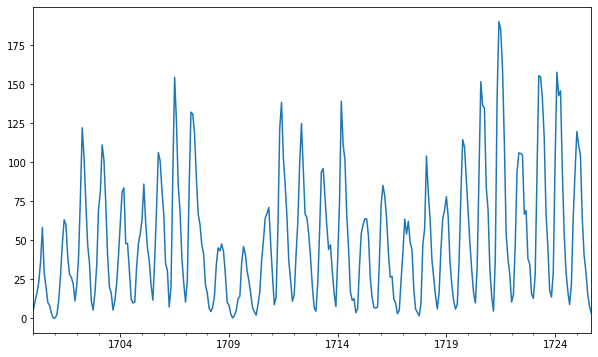

In [4]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [5]:
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 309
Training Observations: 203
Testing Observations: 106


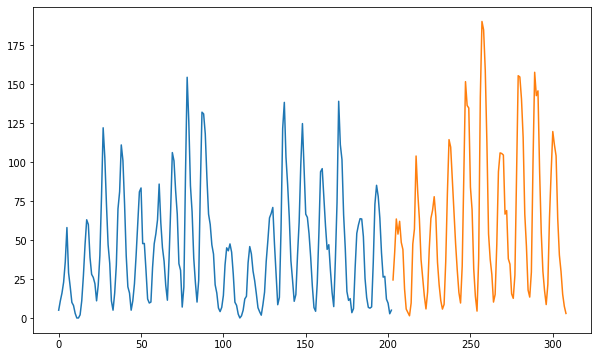

In [6]:
plt.figure(figsize=(10,6));
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.show()

- Aby dobrze nauczyć model nie możemy uczyć na tych samych danych co testujemy. 
- W tym celu dzielimy nasze dane na zbiór treningowy i testowy.
- Możemy powtórzyć proces dzielenia szeregu czasowego na zestawy pociągów i testować wielokrotnie.
- Metoda ta używa coraz to większą i większą historię w procesie uczenia. 

In [7]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

Observations: 155
Training Observations: 78
Testing Observations: 77
Observations: 232
Training Observations: 155
Testing Observations: 77
Observations: 309
Training Observations: 232
Testing Observations: 77


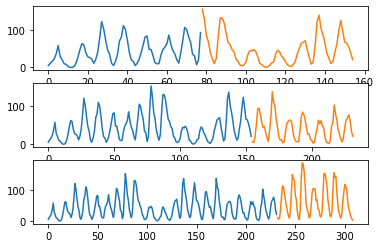

In [8]:
X = series.values
splits = TimeSeriesSplit(n_splits=3)
plt.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1
plt.show()


Observations: 155
Training Observations: 78
Testing Observations: 77


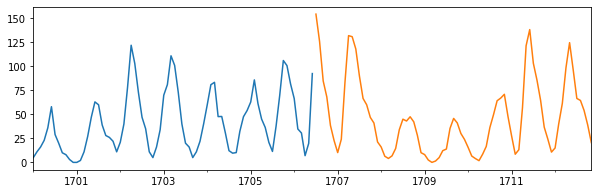

Observations: 177
Training Observations: 100
Testing Observations: 77


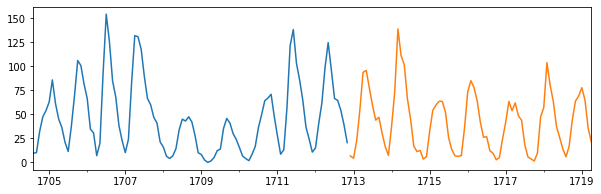

Observations: 177
Training Observations: 100
Testing Observations: 77


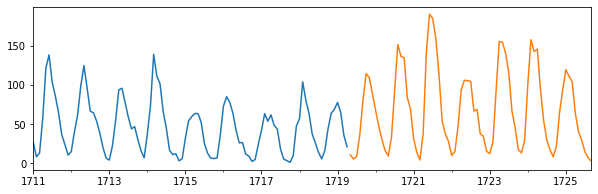

In [10]:
X = series.values
splits = TimeSeriesSplit(n_splits=3,max_train_size=100)
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    
    trainS= series[train_index]
    testS= series[test_index]
    plt.figure(figsize=[10,3])
    trainS.plot()
    testS.plot()
    plt.show()


# Zadanie
W każdym kroku naucz model ARIMA(4,1,0) i wypisz śreni błąd.

Test RMSE: 16.291
Naive RMSE: 21.509


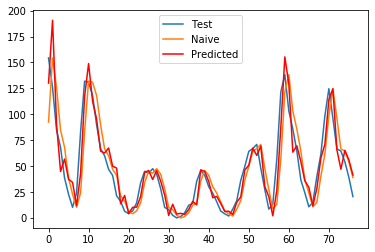

Test RMSE: 17.547
Naive RMSE: 20.041


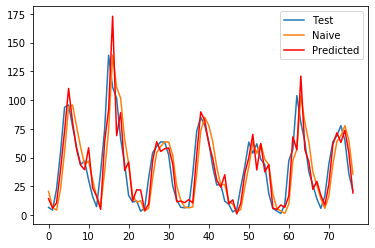

Test RMSE: 22.847
Naive RMSE: 31.945


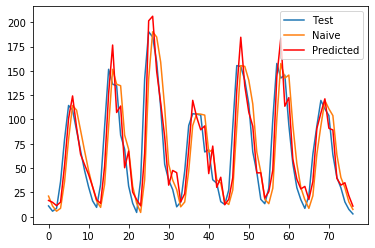

Test RMSE: 18.895
Naive RMSE: 24.498


In [32]:
rmse = []
rmse_naive = []
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    test1 = X[test_index-1]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        # fit model
        model = ARIMA(history, order=(4,1,0))
        model_fit = model.fit()
        # one step forecast
        yhat = model_fit.forecast()[0]
        # store forecast and ob
        predictions.append(yhat)
        history.append(test[t])
        # evaluate forecasts
    rmse.append(sqrt(mean_squared_error(test, predictions)))
    rmse_naive.append(sqrt(mean_squared_error(test, test1)))
    print('Test RMSE: %.3f' % sqrt(mean_squared_error(test, predictions)))
    print('Naive RMSE: %.3f' % sqrt(mean_squared_error(test, test1)))
    # plot forecasts against actual outcomes
    plt.figure()
    plt.plot(test, label = 'Test')
    plt.plot(test1, label = 'Naive')
    plt.plot(predictions, color='red', label = 'Predicted')
    plt.legend()
    plt.show()
rmse = np.mean(rmse)
rmse_naive = np.mean(rmse_naive)
print('Final test RMSE: %.3f' % rmse)
print('Final naive RMSE: %.3f' % rmse_naive)